In [78]:
#%pwd
#!pip install -e ../ 

#%pip list 
#%pip install pip install python-dotenv, networkx

from dotenv import load_dotenv
import os
from cvpartner import CVPartner
%load_ext autoreload
%autoreload 2
%pip list | grep cv


load_dotenv()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cvpartnerpy          0.0.2       /Users/eirik.stavelin/Projects/cvpartnerpy
opencv-python        4.6.0.66
Note: you may need to restart the kernel to use updated packages.


False

In [3]:
cvp = CVPartner(org='noaignite', api_key=os.environ['CVPARTNER_API_KEY'])
#offices = cvp.list_offices()
#offices


In [61]:
dept = cvp.get_department() # will get data engineering
#!pip install networkx

In [115]:
#import json
#print(json.dumps(dept, indent=4))

#dept[1][0].keys()

In [93]:
cvp = CVPartner(org='noaignite', api_key=os.environ['CVPARTNER_API_KEY'])

all_emp = []
for _id, name in cvp.list_offices():
    print(_id, name)
    all_emp.append((name, cvp.get_department(name)))
len(all_emp)


56d7f59569702d248e000004 Admin
5fd0b63c7958da0e882f6e8e CX
56d80bf269702d41da00000a Client Ops
56d80bde69702d41da000008 Content Design
63b3d70930107c100a2bba48 Customer Success Services
56d7f60a69702d248e000008 Data Engineering
63b3d4cb40717e0fb2e8b95a Executive Advisory
56d7f5fd69702d248e000007 Frontend
56d7f5e169702d248e000005 Platforms & Services
63b3d477eef8220fd65d7847 Product Management
56d80bec69702d41da000009 Project Management
5fd0b8067958da0e892f6efd UX


12

In [108]:
from typing import List
import networkx as nx
import matplotlib.pyplot as plt
from cvpartner.graphs import get_roles_and_people_graph, get_all_people_graph


In [114]:

all_people_graph = get_all_people_graph(all_emp)

#nx.draw(all_people_graph)
#all_people_graph.nodes(data=True)
#all_people_graph.edges
nx.write_gexf(all_people_graph, "noa_graph_roles_tags.gexf")


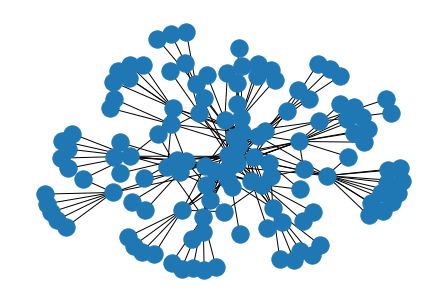

In [27]:


G = get_roles_and_people_graph(dept)  # list of tuple (user, cv)
nx.write_gexf(G, "data_engineering_roles_node_types.gexf")

#nx.draw(G)

In [116]:
#import json
from cvpartner.graphs import get_skills_and_people_graph


skills_graph = get_skills_and_people_graph(dept)


nx.write_gexf(skills_graph, "data_engineering_skills_node_types.gexf")
